In [1]:
import numpy as np
import tensorflow as tf
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline


Using TensorFlow backend.


In [2]:
import keras.backend as K
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt


def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def load_dataset():
    train_dataset = h5py.File('train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


[0 1]
255
600
(600, 64, 64, 3)
(1, 600)
Y_data =  [1]


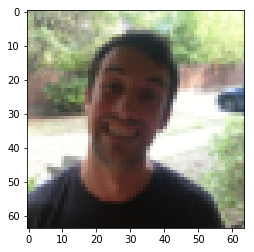

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

index = 5
plt.imshow(X_train_orig[index])

print(classes)
print(np.amax(X_train_orig[0]))
print(len(X_train_orig))
print(np.shape(X_train_orig))
print(np.shape(Y_train_orig))
print("Y_data = ", Y_train_orig[:, index])

In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

print("===========================================================================")

print(X_train.shape)
print(X_train[0].shape)
print(X_train.shape[0:])
print(X_train.shape[1:])
print(X_train.shape[1])


number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)
(600, 64, 64, 3)
(64, 64, 3)
(600, 64, 64, 3)
(64, 64, 3)
64


In [15]:
def Happy_Model(input_shape):
    
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
#    X = ZeroPadding2D((3, 3))(X_input)
    X = X_input

    # CONV -> BN -> RELU Block applied to X
#    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = Conv2D(32, (7, 7), strides = (1, 1), padding='same', name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='Happy_Model')

    return model


In [16]:
# Create the model by calling the function above

happymodel = Happy_Model(X_train.shape[1:])

In [17]:
# Compile the model by calling model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])

happymodel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model on train data by calling model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)

happymodel.fit(X_train, Y_train, epochs=40, batch_size=50)

Epoch 1/40
600/600 [==============================] - 7s 12ms/step - loss: 2.9528 - acc: 0.5500
Epoch 2/40
600/600 [==============================] - 7s 12ms/step - loss: 0.6006 - acc: 0.7400
Epoch 3/40
600/600 [==============================] - 7s 12ms/step - loss: 0.2433 - acc: 0.9033
Epoch 4/40
600/600 [==============================] - 7s 12ms/step - loss: 0.1494 - acc: 0.9483
Epoch 5/40
600/600 [==============================] - 7s 12ms/step - loss: 0.1349 - acc: 0.9600
Epoch 6/40
600/600 [==============================] - 7s 12ms/step - loss: 0.1272 - acc: 0.9600
Epoch 7/40
600/600 [==============================] - 7s 12ms/step - loss: 0.1144 - acc: 0.9533
Epoch 8/40
600/600 [==============================] - 7s 12ms/step - loss: 0.1034 - acc: 0.9717
Epoch 9/40
600/600 [==============================] - 7s 12ms/step - loss: 0.0835 - acc: 0.9700
Epoch 10/40
600/600 [==============================] - 7s 12ms/step - loss: 0.0770 - acc: 0.9800
Epoch 11/40
600/600 [==================

In [19]:
# testing

preds = happymodel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 8ms/step

Loss = 0.06631737520297368
Test Accuracy = 0.9733333373069764


In [20]:
happymodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
fc (Dense)                   (None, 1)                 32769     
Total para